In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mission 1. Netfilx and Code
호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

In [2]:
netflix = pd.read_csv('../data/netflix_titles.csv')

In [3]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### Mandatory Part
[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:

- 한국 작품은 총 얼마나 있는가?  
    - country column을 기준으로 한다.  
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)  

In [4]:
kr_cn = (netflix['country'] == 'South Korea').sum()
print(f'한국 작품의 총 개수: {kr_cn}')

한국 작품의 총 개수: 183


생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.

### Bonus Part
[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:  

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?  
    - country column을 기준으로 한다.  
    - 단일 국가인 경우를 기준으로 결과를 구해보자.  

In [5]:
netflix.dropna(subset=['country'], axis=0, inplace=True)
max_country = netflix[netflix.apply(lambda x: not x['country'].count(','), axis=1)]['country'].value_counts().head(1)
print(f'가장 작품 수가 많은 국가: {max_country.index.values[0]}\n작품 수: {max_country.values[0]}')

가장 작품 수가 많은 국가: United States
작품 수: 2555


## Mission 2. 가즈아!
서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

### Mandatory Part
[다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.  

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.  
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.  
- 이동평균의 기준은 `Open` Column으로 계산합니다.  
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.  

In [6]:
# 기간 설정
s_date = '2016-06-01'
e_date = '2017-06-30'

In [7]:
# 비트코인
bitcoin = pd.read_csv('../data/BitCoin.csv')
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin_1y = bitcoin[(bitcoin['Date'] >= s_date)&(bitcoin['Date'] <= e_date)].sort_values('Date')
bitcoin_1y['5MA'] = bitcoin_1y['Open'].rolling(5).mean()
bitcoin_1y_min = bitcoin_1y[bitcoin_1y['5MA'] == bitcoin_1y['5MA'].min()]
bitcoin_1y_max = bitcoin_1y[bitcoin_1y['5MA'] == bitcoin_1y['5MA'].max()]

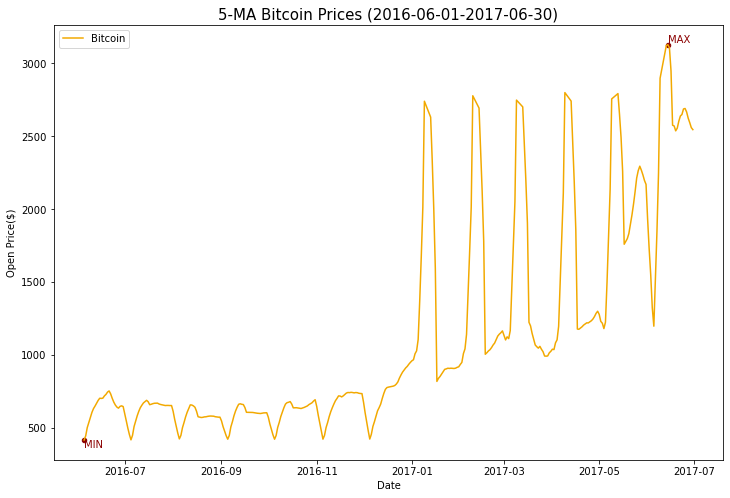

In [8]:
plt.figure(figsize=(12, 8))

plt.plot(bitcoin_1y['Date'], bitcoin_1y['5MA'], color='#f2a900')
plt.scatter(bitcoin_1y_min['Date'], bitcoin_1y_min['5MA'], color='darkred', s=20)
plt.scatter(bitcoin_1y_max['Date'], bitcoin_1y_max['5MA'], color='darkred', s=20)

plt.text(bitcoin_1y_min['Date'], bitcoin_1y_min['5MA'], 'MIN', horizontalalignment='left', verticalalignment='top', color='darkred')
plt.text(bitcoin_1y_max['Date'], bitcoin_1y_max['5MA'], 'MAX', horizontalalignment='left', verticalalignment='bottom', color='darkred')
plt.xlabel('Date')
plt.ylabel('Open Price($)')
plt.title(f'5-MA Bitcoin Prices ({s_date}-{e_date})', size=15)
plt.legend(['Bitcoin'])

plt.show()

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

### Bonus Part
위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.  

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.  
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.  
- 이동평균의 기준은 `Open` Column으로 계산합니다.  
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  

In [9]:
# 이더리움
ethereum = pd.read_csv('../data/ETH_day.csv')
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
ethereum_1y = ethereum[(ethereum['Date'] >= s_date)&(ethereum['Date'] <= e_date)].sort_values('Date')
ethereum_1y['5MA'] = ethereum_1y['Open'].rolling(5).mean()
ethereum_1y_min = ethereum_1y[ethereum_1y['5MA'] == ethereum_1y['5MA'].min()]
ethereum_1y_max = ethereum_1y[ethereum_1y['5MA'] == ethereum_1y['5MA'].max()]

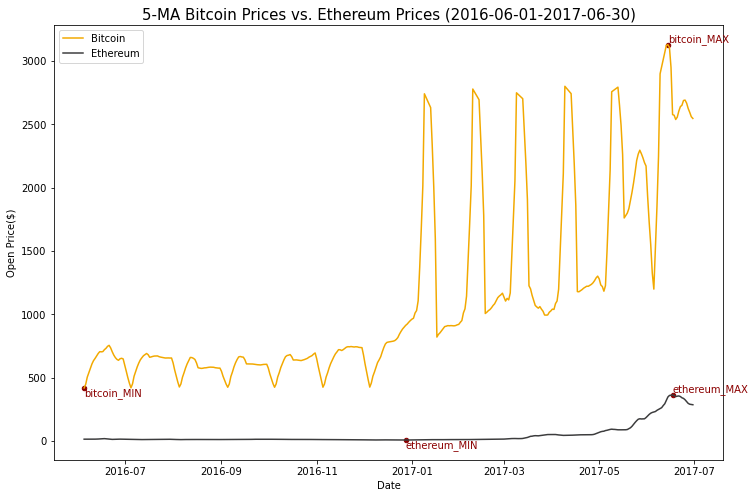

In [10]:
plt.figure(figsize=(12, 8))

plt.plot(bitcoin_1y['Date'], bitcoin_1y['5MA'], color='#f2a900')
plt.scatter(bitcoin_1y_min['Date'], bitcoin_1y_min['5MA'], color='darkred', s=20)
plt.scatter(bitcoin_1y_max['Date'], bitcoin_1y_max['5MA'], color='darkred', s=20)

plt.plot(ethereum_1y['Date'], ethereum_1y['5MA'], color='#3c3c3d')
plt.scatter(ethereum_1y_min['Date'], ethereum_1y_min['5MA'], color='darkred', s=20)
plt.scatter(ethereum_1y_max['Date'], ethereum_1y_max['5MA'], color='darkred', s=20)

plt.text(bitcoin_1y_min['Date'], bitcoin_1y_min['5MA'], 'bitcoin_MIN', horizontalalignment='left', verticalalignment='top', color='darkred')
plt.text(bitcoin_1y_max['Date'], bitcoin_1y_max['5MA'], 'bitcoin_MAX', horizontalalignment='left', verticalalignment='bottom', color='darkred')
plt.text(ethereum_1y_min['Date'], ethereum_1y_min['5MA'], 'ethereum_MIN', horizontalalignment='left', verticalalignment='top', color='darkred')
plt.text(ethereum_1y_max['Date'], ethereum_1y_max['5MA'], 'ethereum_MAX', horizontalalignment='left', verticalalignment='bottom', color='darkred')
plt.xlabel('Date')
plt.ylabel('Open Price($)')
plt.title(f'5-MA Bitcoin Prices vs. Ethereum Prices ({s_date}-{e_date})', size=15)
plt.legend(['Bitcoin', 'Ethereum'])

plt.show()
